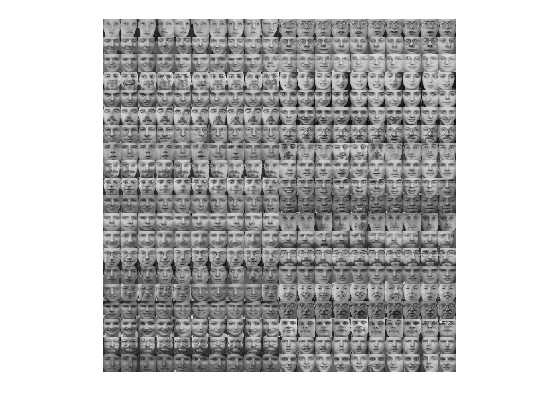

In [66]:
data =load('D:\code\大三课程\机器学习\实验\实验二\orl.mat');
images = data.D;
features = data.X;
F = features';
data1 = F(1:20,:);
labels = data.y;


% 每行显示 20 张图像
num_rows = 20;
num_cols = size(images, 4) / num_rows;
% 设置图形窗口大小
fig = figure;
set(fig, 'Position', [300, 300, 1200, 1200]); % 调整窗口的位置和大小
% 重新组织图像数据，将200张图像堆叠在一起
reshaped_images = reshape(images, size(images, 1), size(images, 2), 1, []);
% 显示整个布局
montage(reshaped_images, 'Size', [num_rows, num_cols]);

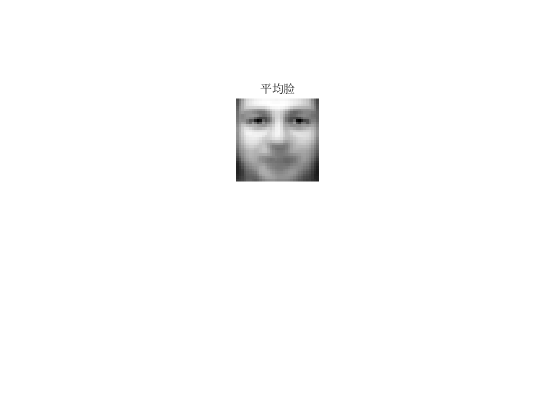

In [67]:
% 计算平均脸
mean_face = mean(features, 2);

% 将平均脸的特征向量转换为图像矩阵
average_face_matrix = reshape(mean_face, [32, 32]);
% 可视化平均脸
imshow(uint8(average_face_matrix), []);
title('平均脸');


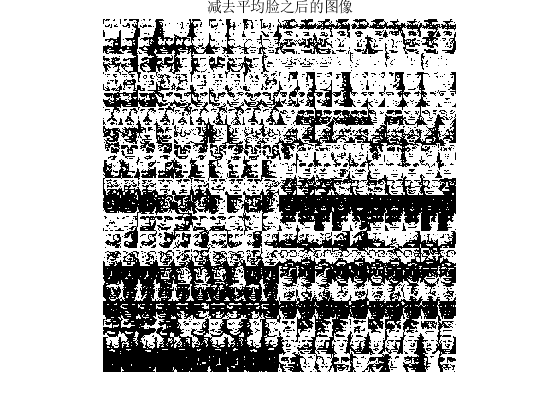

In [68]:
% 将每张图像减去平均脸
num_images = size(features, 2);
ttt = repmat(mean_face, 1, num_images);
centered_features = double(features) - double(ttt);
% 显示每行20张图片
num_rows = 20;
num_cols = num_images / num_rows;
reshaped_images = reshape(centered_features, [32, 32, 1, num_images]);
montage(reshaped_images, 'Size', [num_rows, num_cols]);
title('减去平均脸之后的图像');

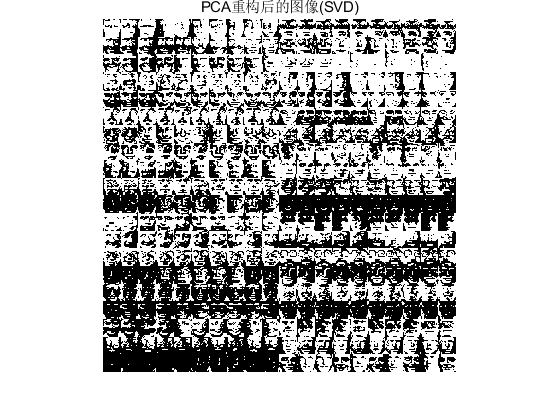

In [69]:
% 检查维度是否大于样本数
if size(centered_features, 1) > size(centered_features, 2)
    % 维度大于样本数，使用SVD
    [U, S, V] = svd(centered_features');
    
    % 选择前 K 个较大的奇异值对应的奇异向量
    K = 100;
    selected_singular_vectors = U(:, 1:K);
    
    % 使用SVD降维后的奇异向量将原始数据投影到降维后的空间中
    new_data = centered_features * selected_singular_vectors;
    
    % 重构数据
    pca_face = new_data * selected_singular_vectors';
    % 将重构后的数据重新整形为图像矩阵
    reshaped_images = reshape(pca_face, 32, 32,[]);
    montage(reshaped_images,'Size',[num_rows, num_cols]);
    title('PCA重构后的图像(SVD)');
else
    % 2. 计算协方差矩阵
    cov_matrix = cov(centered_features');
    % 3. 计算协方差矩阵的特征值和特征向量
    [eigenvalues, eigenvectors] = eig(cov_matrix);
    % 4. 将特征值排序
    eigenvalues_diag = diag(eigenvalues);
    % 对特征值进行降序排序，同时记录排序索引
    [sorted_eigenvalues, sorted_indices] = sort(eigenvalues_diag, 'descend');
    % 5. 保留前 N 个较大特征值对应的特征向量
    K = 100; 

    % 获取前 K 个较大特征值对应的特征向量
    selected_eigenvectors = eigenvectors(:, sorted_indices(1:K));

    % 使用PCA降维后的特征向量将原始数据投影到降维后的空间中
    new_data = centered_features * selected_eigenvectors;

    pca_face = new_data * selected_eigenvectors';

    % 将重构后的数据重新整形为图像矩阵
    reshaped_images = reshape(pca_face, 32, 32,[]);
    % 使用montage函数显示重构的图像
    montage(reshaped_images,'Size',[num_rows, num_cols]);
    title('PCA重构后的图像(EVD)');
end

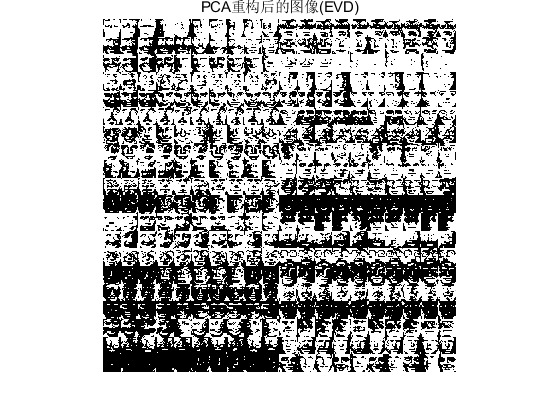

In [75]:
centered_features = centered_features';
% 计算特征之间的协方差矩阵
cov_matrix = (centered_features' * centered_features) / size(centered_features, 1);

% 计算协方差矩阵的特征值和特征向量
[eigenvectors, eigenvalues] = eig(cov_matrix);

% 将特征值排序
eigenvalues_diag = diag(eigenvalues);

% 对特征值进行降序排序，同时记录排序索引
[sorted_eigenvalues, sorted_indices] = sort(eigenvalues_diag, 'descend');
% 选择前N个最大特征值
N = 100;
% 获取前N个较大特征值对应的特征向量
selected_eigenvectors = eigenvectors(:, sorted_indices(1:N));

% 使用PCA降维后的特征向量将原始数据投影到降维后的空间中
new_data = centered_features * selected_eigenvectors;
reconstructed_data = new_data * selected_eigenvectors';
reconstructed_images = reshape(reconstructed_data', 32, 32, []);
montage(reconstructed_images, 'Size', [num_rows, num_cols]);
title('PCA重构后的图像(EVD)');

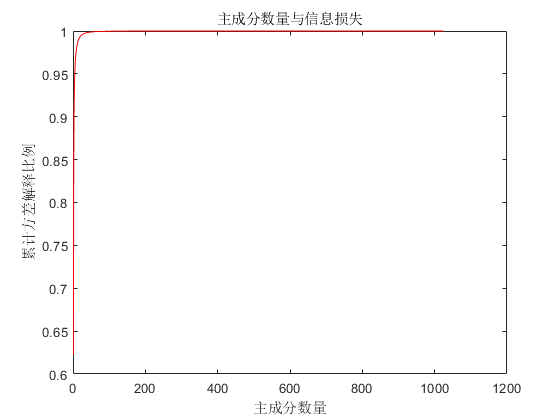

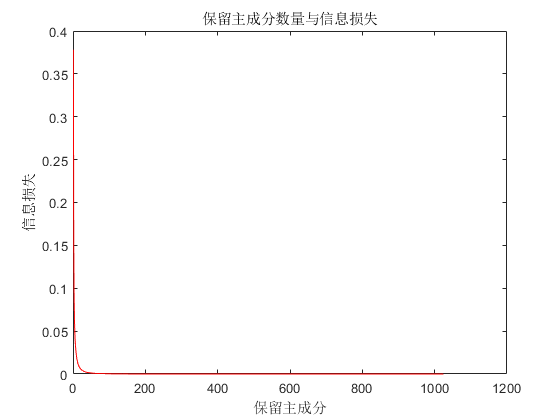

In [71]:
% 计算特征值的累计百分比
t = diag(sorted_eigenvalues); % 取出特征值对角线元素
total_variance = sum(t); % 总方差等于特征值之和
explained_variance = cumsum(t) / total_variance; % 特征值的累计百分比

% 绘制信息损失曲线
figure
plot(explained_variance,'r')
xlabel('主成分数量')
ylabel('累计方差解释比例')
title('主成分数量与信息损失')

% 计算保留不同主成分数量时的信息损失
num_components = 1:length(explained_variance);
info_loss = 1 - explained_variance;
figure
plot(num_components,info_loss,'r')
xlabel('保留主成分')
ylabel('信息损失')
title('保留主成分数量与信息损失')


位置 1 处的逻辑索引包含一个在数组边界之外的 true 值。



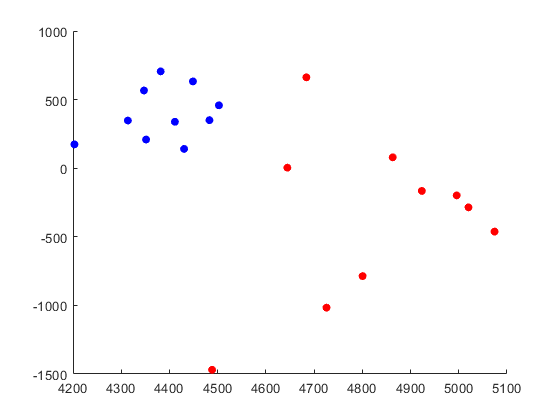

In [72]:
% 假设你的数据矩阵为 data1，每行代表一个样本，每列代表一个特征
% labels 包含每个样本的标签，前10个样本标签为1，后10个样本标签为2

% 计算协方差矩阵
cov_matrix1 = (data1' * data1) / size(data1, 1);

% 使用 PCA 找到前两个主成分的特征向量
[eigenvectors1, eigenvalues1] = eig(cov_matrix1);
[~, sorted_indices1] = sort(diag(eigenvalues1), 'descend');
top_eigenvectors1 = eigenvectors1(:, sorted_indices1(1:2));

% 投影原始数据到前两个主成分上
reduced_data = data1 * top_eigenvectors1;

% 手动指定不同标签的颜色
colors = ['r', 'b'];

% 绘制散点图，不同标签的数据用不同颜色标记
figure;
for i = 1:num_labels
    idx = labels == unique_labels(i);
    scatter(reduced_data(idx, 1), reduced_data(idx, 2), 36, colors(i), 'filled', 'DisplayName', ['Label ' num2str(unique_labels(i))]);
    hold on;
end

xlabel('主成分 1');
ylabel('主成分 2');
title('前20个样本的散点图');
hold off;


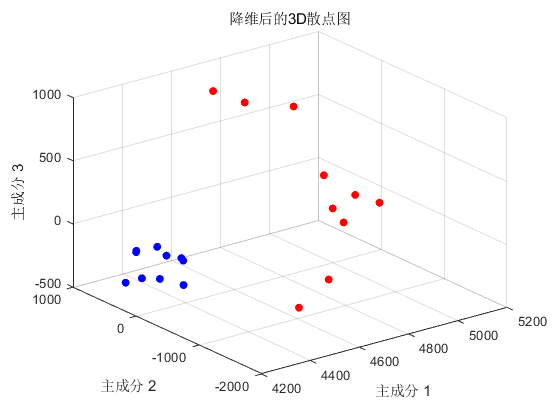

In [73]:
% 假设你的数据矩阵为 data1，每行代表一个样本，每列代表一个特征
% labels 包含每个样本的标签，前10个样本标签为1，后10个样本标签为2

% 计算协方差矩阵
cov_matrix1 = (data1' * data1) / size(data1, 1);

% 使用 PCA 找到前三个主成分的特征向量
[eigenvectors1, eigenvalues1] = eig(cov_matrix1);
[~, sorted_indices1] = sort(diag(eigenvalues1), 'descend');
top_eigenvectors1 = eigenvectors1(:, sorted_indices1(1:3));

% 投影原始数据到前三个主成分上
reduced_data = data1 * top_eigenvectors1;

% 创建颜色映射，用于不同标签的颜色选择
unique_labels = unique(labels);
num_labels = length(unique_labels);

% 创建一个包含每个数据点颜色的矩阵，每行代表一个数据点的颜色信息
% 这里示范了为前两个标签设置不同颜色，你可以根据需要设置更多颜色
color_map = zeros(size(reduced_data, 1), 3); % 初始化颜色矩阵

% 设置第一个标签的颜色为红色
color_map(labels == 1, :) = repmat([1, 0, 0], sum(labels == 1), 1); % RGB颜色代码

% 设置第二个标签的颜色为蓝色
color_map(labels == 2, :) = repmat([0, 0, 1], sum(labels == 2), 1); % RGB颜色代码

% 绘制3D散点图，使用手动设置的颜色
figure;
scatter3(reduced_data(:, 1), reduced_data(:, 2), reduced_data(:, 3), 36, color_map, 'filled');

xlabel('主成分 1');
ylabel('主成分 2');
zlabel('主成分 3');
title('降维后的3D散点图');
